# Abalone Case Study

Problem Statement:

The age of abalone is determined by cutting the shell through the cone, staining it, and counting the number of rings through a microscope -- a boring and time-consuming task. Other measurements, which are easier to obtain, are used to predict the age. Further information, such as weather patterns and location (hence food availability) may be required to solve the problem.

# Attribute Information: 

Given is the attribute name, attribute type, the measurement unit and a brief description. The number of rings is the value to predict. 

Name / Data Type / Measurement Unit / Description
-----------------------------
Sex / nominal / -- / M, F, and I (infant)

Length / continuous / mm / Longest shell measurement

Diameter / continuous / mm / perpendicular to length

Height / continuous / mm / with meat in shell
Whole weight / continuous / grams / whole abalone

Shucked weight / continuous / grams / weight of meat

Viscera weight / continuous / grams / gut weight (after bleeding)

Shell weight / continuous / grams / after being dried

Rings / integer / -- / +1.5 gives the age in years. 

You have to predict the rings of each abalone which will lead us to the age of that abalone. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset1/master/abalone.csv')
df

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


# Data Description

Sex: Sex (M: Male, F: Female, I: Infant)

Length: Longest Shell measurement (millimetres - mm)

Diameter: Diameter - perpendicular to length (mm)

Height: Height - with meat in shell (mm)

Whole weight: Weight of whole abalone (grams)

Shucked weight: Weight of meat (grams)

Viscera weight: Gut weight after bleeding (grams)

Shell weight: Shell weight - after being dried (grams)

Rings: Rings - value + 1.5 gives age in years (eg. 5 = 6.5 years)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


Sex is an object data type, we wil have to convert it later use any Encoder techniques

In [4]:
#Check for null
df.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

No null records are found, so we are good here 

In [5]:
df.shape

(4177, 9)

# Check Duplicates

In [6]:
duplicate = df[df.duplicated(keep = 'last')]
print("Duplicate Rows :")
  
# Print the resultant Dataframe
duplicate

Duplicate Rows :


,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings


No Duplicates found

# Check value counts of Male, Female and Infant

In [7]:
df['Sex'].value_counts()

M    1528
I    1342
F    1307
Name: Sex, dtype: int64

Data looks to be balanced

<AxesSubplot:xlabel='count', ylabel='Sex'>

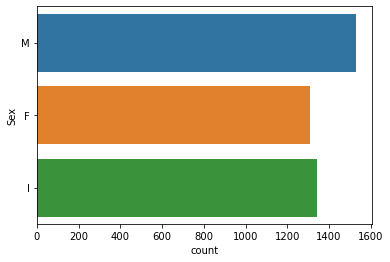

In [8]:
sns.countplot(y=df['Sex'])

The above graph shows that number of Males are more than Female and number of Female is less than Infant

In [10]:
df.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


Length : Length is the Longest Shell measurement and it lies between 0.075mm to 0.615mm. We dont see much outliers.

Diameter : Diameter is perpendiculat to length and it lies between 0.055mm to 0.48mm and measurements are closer to length. Here also we dont see much outliers.

Height : Height with the meat in the shell lies between 0.115mm to 0.165mm. It has few outliers.

Whole weight : Whole weight of the whole Abalone lies between 0.002gram to 1.153 grams. It has few outliers.

Shucked weight : Shucked weight i.e weight of the meat lies between 0.001 gram to 0.502 gram and has outliers.

Viscera weight :Viscera weight is the gut weight after bleeding and lies between 0.0005 gram to 0.253 grams. It also has some outliers.

Shell weight :Shell weight is the weight after being dried and it lies between 0.001500gram to 0.329000 grams. It has few outliers.

Rings : It has minimum value as 1 and maximum as 29 which is an outlier for sure

# Correlation

In [11]:
df.corr()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
Length,1.000000,0.986812,0.827554,0.925261,0.897914,0.903018,0.897706,0.556720
Diameter,0.986812,1.000000,0.833684,0.925452,0.893162,0.899724,0.905330,0.574660
Height,0.827554,0.833684,1.000000,0.819221,0.774972,0.798319,0.817338,0.557467
Whole weight,0.925261,0.925452,0.819221,1.000000,0.969405,0.966375,0.955355,0.540390
Shucked weight,0.897914,0.893162,0.774972,0.969405,1.000000,0.931961,0.882617,0.420884
Viscera weight,0.903018,0.899724,0.798319,0.966375,0.931961,1.000000,0.907656,0.503819
Shell weight,0.897706,0.905330,0.817338,0.955355,0.882617,0.907656,1.000000,0.627574
Rings,0.556720,0.574660,0.557467,0.540390,0.420884,0.503819,0.627574,1.000000


<AxesSubplot:>

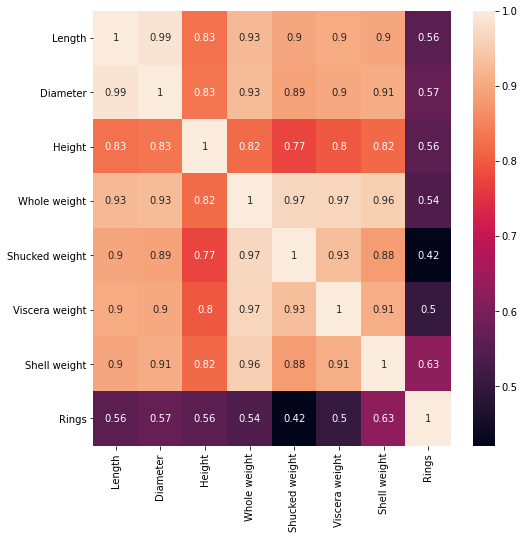

In [12]:
plt.figure(figsize = (8,8))
sns.heatmap(df.corr(), annot = True)

# Correlation Analysis

We see that some of the input features are highly correlated. For example, the correlation between whole weight and length of abalone is 0.97, indicating that these two features are highly positively correlated. This will potentially raise the multicollinearity concern. As a result, it can become difficult for the model to estimate the relationship between each independent variable and the dependent variable independently. 

Additionally, the high correlation between many of the features may insinuate that many of the features are redundant and the inclusion of all of them may be unnecessary. For example, including both diameter and length conveys very similar messages about the biology of the abalone, and may indicate that it is unnecessary to include both of these biological features. 

In [13]:
corr_matrix=df.corr()
corr_matrix['Rings'].sort_values(ascending=False)

Rings             1.000000
Shell weight      0.627574
Diameter          0.574660
Height            0.557467
Length            0.556720
Whole weight      0.540390
Viscera weight    0.503819
Shucked weight    0.420884
Name: Rings, dtype: float64

In [14]:
df.head(1)

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.514,0.2245,0.101,0.15,15


In [15]:
dataToPlot=df.loc[:, df.columns != 'Sex']
dataToPlot.head(2)

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.15,15
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.07,7


In [16]:
targetToPlot=df.loc[:, df.columns == 'Sex']
targetToPlot.head(2)

,Sex
0,M
1,M


# Box Plot

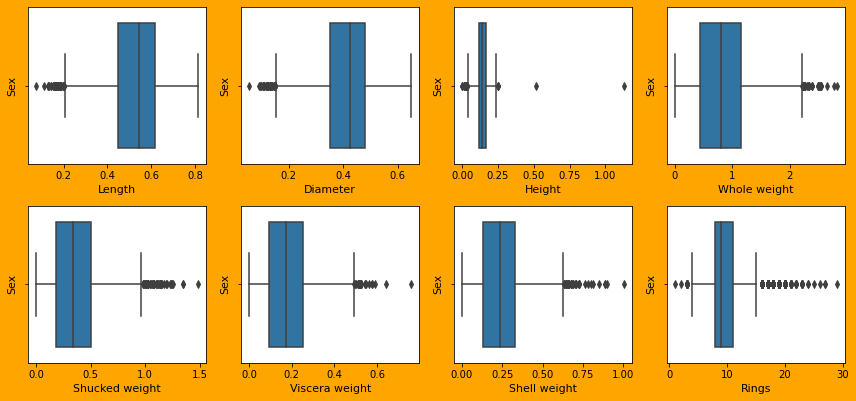

In [17]:
#Lets see data distribution using Box Plot
plt.figure(figsize=(12,8),facecolor='orange')
graph=1

for column in dataToPlot:
    
    if graph<=12:
        ax=plt.subplot(3,4,graph)        
        sns.boxplot(dataToPlot[column])
        plt.xlabel(column,fontsize=11)
        plt.ylabel('Sex',fontsize=11)
        
    graph+=1   
    
plt.tight_layout()

The columns has maximum outliers are Shucked weight, Whole weight, Shell weight ,Viscera weight and Rings

Length and Diameter looks same and has minimum outliers, Same with Height it has very less outliers.

In [124]:
df.columns

Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Rings'],
      dtype='object')

<AxesSubplot:xlabel='Length', ylabel='Rings'>

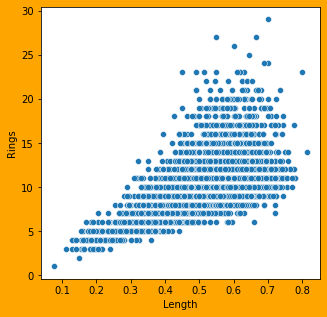

In [19]:
#Lets see data distribution using Length(Independent Variable) and Rings(Dependent Variable)
plt.figure(figsize=(5,5),facecolor='orange')
sns.scatterplot(x="Length",y="Rings",data=df)

Maximum number of rings are present at length 0.1 to 0.7 as per the graph

<AxesSubplot:xlabel='Diameter', ylabel='Rings'>

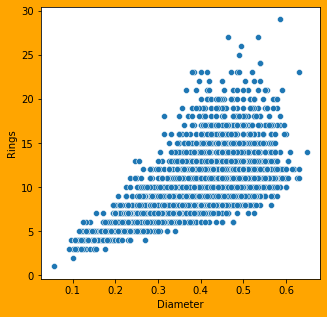

In [20]:
#Lets see data distribution using Diameter(Independent Variable) and Rings(Dependent Variable)
plt.figure(figsize=(5,5),facecolor='orange')
sns.scatterplot(x="Diameter",y="Rings",data=df)

Maximum number of rings are present at length 0.1 to 0.6 as per the graph. The number of rings ranges between 3 to 20 for the length 0.1 to 0.6

<AxesSubplot:xlabel='Height', ylabel='Rings'>

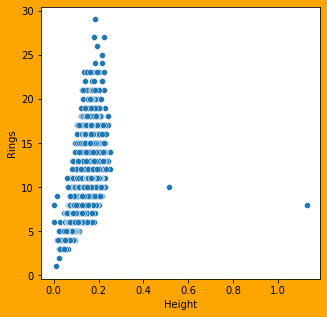

In [21]:
#Lets see data distribution using Height(Independent Variable) and Rings(Dependent Variable)
plt.figure(figsize=(5,5),facecolor='orange')
sns.scatterplot(x="Height",y="Rings",data=df)

Height of the meat and Rings have very less relation as per the graph. Even if the Height increases, the number of Rings make no difference

<AxesSubplot:xlabel='Whole weight', ylabel='Rings'>

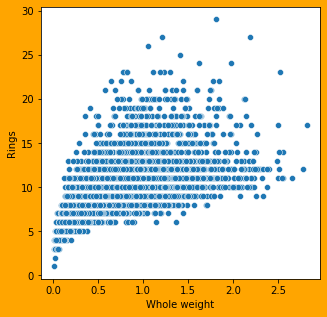

In [22]:
#Lets see data distribution using Whole weight(Independent Variable) and Rings(Dependent Variable)
plt.figure(figsize=(5,5),facecolor='orange')
sns.scatterplot(x="Whole weight",y="Rings",data=df)

Maximum number of rings are present where the whole weight of the abalone is between 0.1 to 2 gram as per the graph. If the Whole weight increases further, it will have no impact on the number of rings.

<AxesSubplot:xlabel='Shucked weight', ylabel='Rings'>

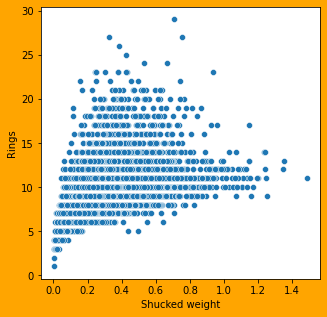

In [23]:
#Lets see data distribution using Shucked weight(Independent Variable) and Rings(Dependent Variable)
plt.figure(figsize=(5,5),facecolor='orange')
sns.scatterplot(x="Shucked weight",y="Rings",data=df)

Maximum number of rings are present where the weight of the meat is 0.1 to 1.1 gram as per the graph.If the Shucked weight increases further, it will have no impact on the number of rings.

<AxesSubplot:xlabel='Viscera weight', ylabel='Rings'>

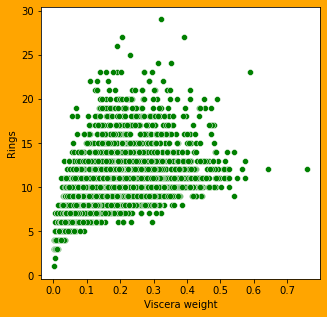

In [127]:
#Lets see data distribution using Viscera weight(Independent Variable) and Rings(Dependent Variable)
plt.figure(figsize=(5,5),facecolor='orange')
sns.scatterplot(x="Viscera weight",y="Rings",data=df,color='g')

Maximum number of rings are present where the weight of the meat is 0.1 to 1.5 gram as per the graph. If the Viscera weight increases further, it will have no impact on the number of rings.

<AxesSubplot:xlabel='Shell weight', ylabel='Rings'>

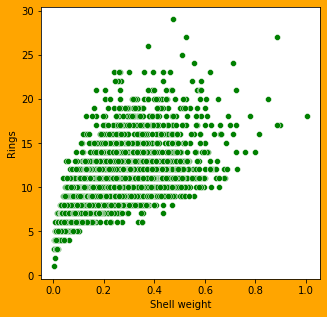

In [128]:
#Lets see data distribution using Shell weight(Independent Variable) and Rings(Dependent Variable)
plt.figure(figsize=(5,5),facecolor='orange')
sns.scatterplot(x="Shell weight",y="Rings",data=df,color='g')

Maximum number of Rings are present where Shell weight between 0.2 to 0.6 grams. If the Shell weight increases further, it will have no impact on the number of rings.

In [130]:
X = df.drop('Rings' , axis=1) #Input
y = df['Rings'] #Output

In [131]:
X.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055


In [132]:
set(X['Sex']) 

{0, 1, 2}

In [133]:
from sklearn.preprocessing import LabelEncoder
enc=LabelEncoder()
X['Sex']=enc.fit_transform(X['Sex'])

In [134]:
set(X['Sex'])

{0, 1, 2}

In [135]:
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


# DistPlot

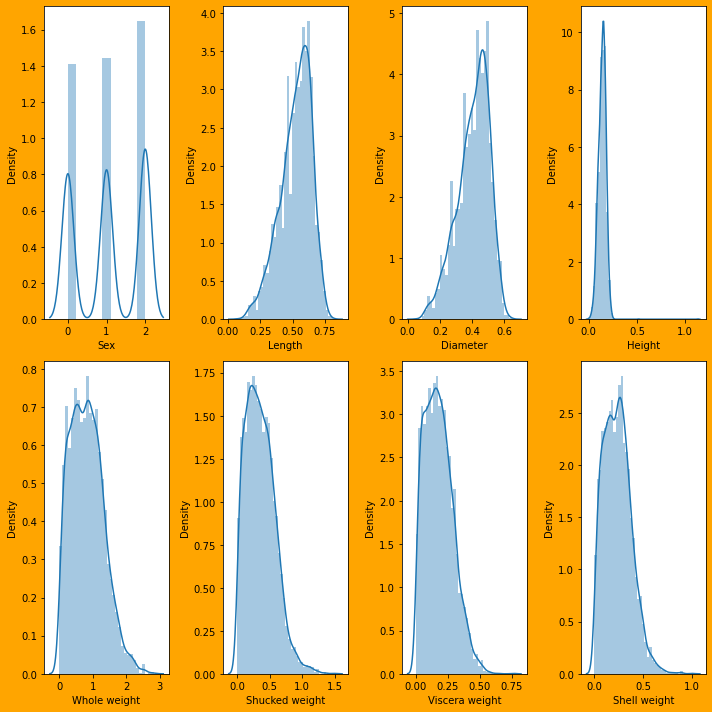

In [136]:
#Lets see data distribution again
plt.figure(figsize=(10,10),facecolor='orange')
plotnumber=1

for column in X:
    #print(column)
    if plotnumber<=8:
        ax=plt.subplot(2,4,plotnumber)        
        sns.distplot(X[column])
        plt.xlabel(column,fontsize=10)
        
    plotnumber+=1   
    
plt.tight_layout()

Whole weight, Shucked weight, Viscera weight and Shell weight are right skewed but Height is the one which looks most skewed.

There is some left skewness in Length and Diameter

# Correlation and Relationship

In [34]:
df.groupby('Sex')[['Length', 'Diameter', 'Height', 'Whole weight', 
                   'Shucked weight','Viscera weight', 'Shell weight', 'Rings']].mean().sort_values(by = 'Rings',ascending = False)

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
Sex,,,,,,,,
F,0.579093,0.454732,0.158011,1.046532,0.446188,0.230689,0.302010,11.129304
M,0.561391,0.439287,0.151381,0.991459,0.432946,0.215545,0.281969,10.705497
I,0.427746,0.326494,0.107996,0.431363,0.191035,0.092010,0.128182,7.890462


The analysis above gives somewhat closer picture of how the data is.

For Female and Male, Length and Diameter are almost same, Height also has very less difference, followed by Whole weight, shucked weight, Viscera weight Shell weight and Rings
All parameters are very close 

Infant has good difference and it is easy to identify from the data which we have.

In [35]:
float_columns = [x for x in df.columns if x not in ['Sex', 'Rings']]

# correlation matrix : 
corr_mat = df[float_columns].corr()
# Strip out the diagnoal values for next step:
for x in range(len(float_columns)):
    corr_mat.iloc[x,x] = 0.0
    
corr_mat 

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight
Length,0.000000,0.986812,0.827554,0.925261,0.897914,0.903018,0.897706
Diameter,0.986812,0.000000,0.833684,0.925452,0.893162,0.899724,0.905330
Height,0.827554,0.833684,0.000000,0.819221,0.774972,0.798319,0.817338
Whole weight,0.925261,0.925452,0.819221,0.000000,0.969405,0.966375,0.955355
Shucked weight,0.897914,0.893162,0.774972,0.969405,0.000000,0.931961,0.882617
Viscera weight,0.903018,0.899724,0.798319,0.966375,0.931961,0.000000,0.907656
Shell weight,0.897706,0.905330,0.817338,0.955355,0.882617,0.907656,0.000000


In [36]:
# pairwise maximal correlations: 
corr_mat.abs().idxmax()

Length                  Diameter
Diameter                  Length
Height                  Diameter
Whole weight      Shucked weight
Shucked weight      Whole weight
Viscera weight      Whole weight
Shell weight        Whole weight
dtype: object

The above comparsion shows the Pairwise maximal correlations.
We see that Length, Diameter and Height are correlated pairwise

Interesting is that Whole weight is correlated with Shucked Weight, Viscera weight and shell weight. 

SO going further it will be safe to remove Whole weight or Diameter/Length but before that we will check that which combination gives us more Adjusted RSquare value.

# Skew Examination

In [37]:
df.skew()

Length           -0.639873
Diameter         -0.609198
Height            3.128817
Whole weight      0.530959
Shucked weight    0.719098
Viscera weight    0.591852
Shell weight      0.620927
Rings             1.114102
dtype: float64

In [38]:
skew_columns = (df[float_columns].skew().sort_values(ascending=False))
skew_columns = skew_columns.loc[skew_columns > 0.75]
skew_columns

Height    3.128817
dtype: float64

Here we see that Height is the one column which is skewed the most

# LabelEncoder to convert Sex into int type

In [39]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex'])

df['Sex'].value_counts

<bound method IndexOpsMixin.value_counts of 0       2
1       2
2       0
3       2
4       1
       ..
4172    0
4173    2
4174    2
4175    0
4176    2
Name: Sex, Length: 4177, dtype: int32>

Female has been encoded to 0

Infant has been encoded to 1

Male has been encode to 2

# Z-Score to remove Outliers

In [40]:
from scipy.stats import zscore
z=np.abs(zscore(df))
z.shape

(4177, 9)

In [41]:
threshold=3
print(np.where(z>3))

(array([   6,   72,   81,   83,  129,  163,  164,  165,  165,  165,  166,
        166,  167,  168,  170,  181,  232,  236,  236,  236,  237,  237,
        238,  238,  239,  270,  275,  277,  278,  294,  310,  313,  314,
        334,  351,  355,  358,  358,  362,  375,  416,  417,  428,  431,
        433,  469,  478,  480,  501,  526,  526,  530,  572,  628,  673,
        674,  675,  678,  694,  696,  696,  719,  719,  720,  720,  744,
        754,  756,  811,  891,  891,  891, 1048, 1051, 1051, 1052, 1193,
       1197, 1199, 1202, 1204, 1206, 1206, 1207, 1207, 1207, 1207, 1209,
       1209, 1257, 1417, 1417, 1418, 1422, 1426, 1427, 1427, 1427, 1428,
       1429, 1429, 1528, 1754, 1756, 1757, 1759, 1761, 1762, 1762, 1762,
       1763, 1763, 1763, 1821, 1982, 1986, 1987, 1987, 2051, 2090, 2108,
       2108, 2114, 2114, 2157, 2161, 2176, 2180, 2199, 2201, 2208, 2209,
       2274, 2275, 2305, 2334, 2334, 2334, 2335, 2344, 2358, 2368, 2381,
       2436, 2459, 2471, 2544, 2623, 2624, 2624, 2

In [42]:
df_new=df[(z<3).all(axis=1)]
print(df.shape)
print(df_new.shape)

(4177, 9)
(4027, 9)


# Percentage Data Loss

In [43]:
loss_percentage= ((4177-4027)/4177)*100
loss_percentage

3.5910940866650707

Loss Percentage is Acceptable and within limits

In [44]:
dataToPlot=df_new.loc[:, df.columns != 'Rings']
dataToPlot.head(5)

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055


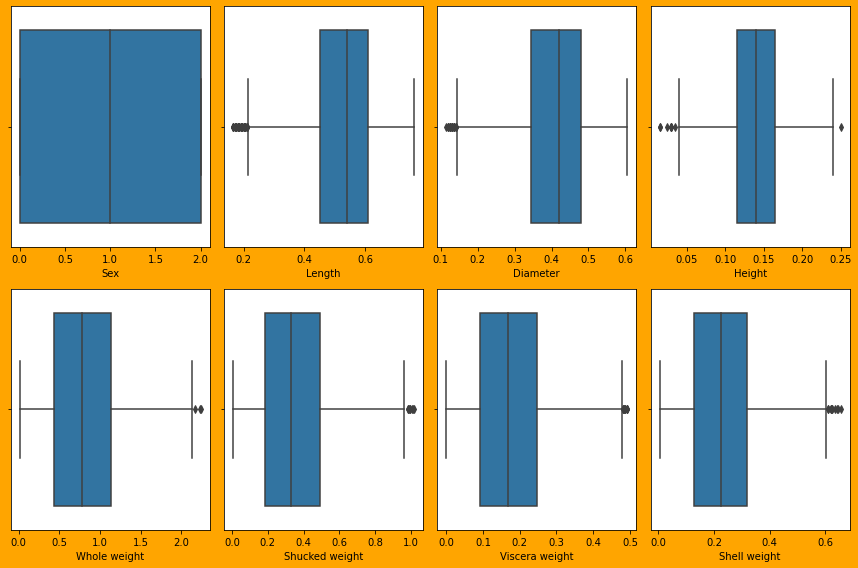

In [45]:
#Lets see data distribution again
plt.figure(figsize=(12,8),facecolor='orange')
graph=1

for column in dataToPlot:
    
    if graph<=8:
        ax=plt.subplot(2,4,graph)        
        sns.boxplot(dataToPlot[column])
        plt.xlabel(column,fontsize=10)
        
    graph+=1   
    
plt.tight_layout()

So, we have removed most of the outliers and data loss is also not that much

# Transforming Data to remove Skewness

In [46]:
#Lets divide the data into features and vectors 
#Features into x
X=df_new.iloc[:,:-1]

#Vector in y
y=df_new.iloc[:,-1]

In [47]:
X.head(5)

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055


In [48]:
y[0]

15

In [49]:
from sklearn.preprocessing import power_transform
x=power_transform(X,method='yeo-johnson')

In [50]:
df_new.skew()

Sex              -0.094886
Length           -0.623076
Diameter         -0.598650
Height           -0.244251
Whole weight      0.334204
Shucked weight    0.458295
Viscera weight    0.437116
Shell weight      0.349471
Rings             0.725464
dtype: float64

In [51]:
X = df_new.iloc[:,:-1]

In [52]:
X.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055


In [53]:
# Finding variance Inflation factor in each scaled column i.e x.shape[1] (1/(1-R2)
# Age and Expereince, you can predict Salary, so Multi colinearity problem is there
# Thats why we first use Standard Scaler to standardise the data and then use vif

In [54]:
X_vif=df.drop(columns=['Rings'])
X_vif.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055


In [55]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
#Pass the value where Power Transform is stored, In this case it is x

vif['vif']=[variance_inflation_factor(x,i) for i in range(x.shape[1])]
vif['features']=X_vif.columns

# Let's check the values now
vif

,vif,features
0,1.013199,Sex
1,34.538446,Length
2,33.515527,Diameter
3,6.524799,Height
4,136.046977,Whole weight
5,36.257857,Shucked weight
6,21.937509,Viscera weight
7,30.127367,Shell weight


# Fixing Multicollinearity

Although correlation matrix and scatter plots can also be used to find multicollinearity, their findings only show the bivariate relationship between the independent variables. VIF is preferred as it can show the correlation of a variable with a group of other variables.

Dropping one of the correlated features will help in bringing down the multicollinearity between correlated features but here our problem is regression, so vif will help us further to identify correct columns to use to get the maximum Adjust RSquare value

In [56]:
# pairwise maximal correlations: 
corr_mat.abs().idxmax()

Length                  Diameter
Diameter                  Length
Height                  Diameter
Whole weight      Shucked weight
Shucked weight      Whole weight
Viscera weight      Whole weight
Shell weight        Whole weight
dtype: object

In [57]:
X = df.drop(['Whole weight','Shucked weight','Length','Viscera weight'],axis=1)

X.columns

Index(['Sex', 'Diameter', 'Height', 'Shell weight', 'Rings'], dtype='object')

In [58]:
x=power_transform(X,method='yeo-johnson')

In [59]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
#Pass the value where Power Transform is stored, In this case it is x

vif['vif']=[variance_inflation_factor(x,i) for i in range(x.shape[1])]
vif['features']=X.columns

# Let's check the values now
vif

,vif,features
0,1.004286,Sex
1,11.885856,Diameter
2,5.413197,Height
3,14.345140,Shell weight
4,2.047049,Rings


So we see that we have reduced the multicollinearity problem in our data to good extent, Lets check this data and use Linear Regression model to reduce it further.

But one thin we notuce that remove lot of columns will surely lead to more data loss which will not be acceptable to anyone. So, lets analyse first with Linear Regression and take steps further. This is obvious that above vif score will definetely help us to identify the columns further

In [60]:
X.head()

,Sex,Diameter,Height,Shell weight,Rings
0,2,0.365,0.095,0.150,15
1,2,0.265,0.090,0.070,7
2,0,0.420,0.135,0.210,9
3,2,0.365,0.125,0.155,10
4,1,0.255,0.080,0.055,7


# Standard Scalar

In [61]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

x=sc.fit_transform(X)

We fit a logistic regression and tuned it by using grid search. Other classification models like decision tree or KNN can be used in this project. We chose logistic regression for its good interpretability and its performance. However, with better feature engineering or better model selection, the performance can be improved.

# Desciption : Linear and Multiple Regression

The rings of abalone can’t be realted with only one predict, so I will set the full model of the data firstly, then change prediction models with different predictors. I will test the significance of the regression of those models with F test, single test to narrow and adjust the model for several time to get the best fit model.

Divide the data into Features and Target

In [62]:
y = X['Rings']
x = X.drop(['Rings'], axis = 1)

# getting the shapes
print("Shape of x:", x.shape)
print("Shape of y:", y.shape)

Shape of x: (4177, 4)
Shape of y: (4177,)


In [63]:
sc=StandardScaler()

x=sc.fit_transform(x)

In [64]:
X.head(1)

,Sex,Diameter,Height,Shell weight,Rings
0,2,0.365,0.095,0.15,15


In [65]:
df_new.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [66]:
df_new.rename(columns={"Viscera weight": "Viscera_weight","Whole weight":"Whole_weight","Shucked weight":"Shucked_weight","Shell weight":"Shell_weight"}, errors="raise",inplace=True)

In [67]:
#Sex +Diameter+ Height+Shell_weight+Diameter+Shucked_weight
x_models = df_new.drop(['Whole_weight','Length','Viscera_weight'],axis=1)

In [68]:
x_models.head()

,Sex,Diameter,Height,Shucked_weight,Shell_weight,Rings
0,2,0.365,0.095,0.2245,0.150,15
1,2,0.265,0.090,0.0995,0.070,7
2,0,0.420,0.135,0.2565,0.210,9
3,2,0.365,0.125,0.2155,0.155,10
4,1,0.255,0.080,0.0895,0.055,7


In [69]:
y_model = x_models['Rings']
y_model[3]

10

# LinearRegression

In [70]:
from sklearn.linear_model import LinearRegression
lm=LinearRegression()
lm.fit(x_models,y_model)
#Print Intercept and CoEfficients
print(lm.intercept_)
print(lm.coef_)



7.105427357601002e-15
[ 5.98014649e-17 -1.81060710e-14 -1.47144564e-14  9.87118145e-15
 -1.17231349e-14  1.00000000e+00]


In [71]:
df_new.columns

Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole_weight', 'Shucked_weight',
       'Viscera_weight', 'Shell_weight', 'Rings'],
      dtype='object')

In [72]:
import statsmodels.formula.api as smf
lm=smf.ols(formula='Rings ~ Sex',data=df_new).fit()
print("lm.rsquared :",lm.rsquared)

lm.rsquared : 0.0011070424482765295


In [73]:
df_new.head(2)

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.15,15
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.07,7


In [74]:
lm=smf.ols(formula='Rings ~ Sex+Diameter+Height+Whole_weight',data=df_new).fit()
lm.rsquared

0.3846111687617676

Lets add Shell weight and check the rsquare value

In [75]:
lm=smf.ols(formula='Rings ~ Sex+Diameter+Height+Whole_weight+Shell_weight',data=df_new).fit()
print("lm.rsquared     : ",lm.rsquared)
print("lm.rsquared_adj :", lm.rsquared_adj)

lm.rsquared     :  0.45286256846961337
lm.rsquared_adj : 0.4521822185174492


Adding Shell weight increase the rsquare value to a good extent. Lets add Viscera weight anc check the rsquare value

In [76]:
lm=smf.ols(formula='Rings ~ Sex+Diameter+Height+Whole_weight+Shell_weight+Viscera_weight',data=df_new).fit()
print("lm.rsquared     : ",lm.rsquared)
print("lm.rsquared_adj :", lm.rsquared_adj)

lm.rsquared     :  0.4528632343369037
lm.rsquared_adj : 0.45204661229860055


There is no effect in our model when we add Viscera weight, So we will not use Viscera weight.

Now, lets use Shucked weight and check the rsquare value.

In [77]:
lm=smf.ols(formula='Rings ~ Sex+Diameter+Height+Whole_weight+Shell_weight+Shucked_weight',data=df_new).fit()
print("lm.rsquared     : ",lm.rsquared)
print("lm.rsquared_adj :",lm.rsquared_adj)

lm.rsquared     :  0.5096664881930777
lm.rsquared_adj : 0.5089346471306793


Adding Shucked weight did helped us to increase the rsquare value which tells the importance of this column. So we will keep this. 

Now, lets remove the Whole weight and check the rsquare value and adjusted rsquare value

In [78]:
lm=smf.ols(formula='Rings ~ Sex+Diameter+Height+Shell_weight+Shucked_weight',data=df_new).fit()
print("lm.rsquared     : ",lm.rsquared)
print("lm.rsquared_adj :",lm.rsquared_adj)

lm.rsquared     :  0.5002668849632748
lm.rsquared_adj : 0.4996454809405979


There is almost no impact in rsquare and adjusted rsquare value when we remove the Whole weight

In [79]:

lm=smf.ols(formula='Rings ~ Sex +Diameter+ Height+Shell_weight+Shucked_weight',data=df_new).fit()
lm.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Rings   R-squared:                       0.500
Model:                            OLS   Adj. R-squared:                  0.500
Method:                 Least Squares   F-statistic:                     805.1
Date:                Wed, 16 Feb 2022   Prob (F-statistic):               0.00
Time:                        23:22:34   Log-Likelihood:                -8555.1
No. Observations:                4027   AIC:                         1.712e+04
Df Residuals:                    4021   BIC:                         1.716e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          2.3203      0.259      8.945      0.000       1.812       2.829
Sex                0.0569      0.039      1.452      0.147      -0.020       0.134
Diameter          10.1937      1.048      9.722      0.000       8.138      12.249
Height            23.0508      2.196     10.498      0.000      18.746      27.355
Shell_weight      16.8222      0.754     22.318      0.000      15.344      18.300
Shucked_weight   -10.9836      0.392    -27.988      0.000     -11.753     -10.214
==============================================================================
Omnibus:                      702.386   Durbin-Watson:                   1.366
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1335.723
Skew:                           1.072   Prob(JB):                    8.94e-291
Kurtosis:                       4.835   Cond. No.                         119.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [80]:
lm=smf.ols(formula='Rings ~ Sex +Diameter+ Height+Shell_weight+Diameter+Shucked_weight',data=df_new).fit()
lm.rsquared

0.5002668849632748

      (Intercept)    diameter      height     shucked       shell

       2.3203      10.1937       23.0508    -10.9836      16.8222

# So formula is :
    
    2.3203 + 10.1937 *x_diameter+ 23.0508*x_height -10.9836 *x_shucked + 16.8222*x_shell

# Scaling the data using MinMax Scalar:

In [81]:
df_new.columns

Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole_weight', 'Shucked_weight',
       'Viscera_weight', 'Shell_weight', 'Rings'],
      dtype='object')

In [83]:
features=df_new.drop("Rings",axis=1)
target=df_new["Rings"]

In [88]:
from sklearn.preprocessing import MinMaxScaler
mms=MinMaxScaler()
from sklearn.linear_model import LinearRegression
linear=LinearRegression()
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

# Train-Test Split

In [90]:
for i in range(0,100):
    features_train,features_test,target_train,target_test=train_test_split(features,target,test_size=0.2,random_state=i)
    linear.fit(features_train,target_train)
    pred_train=linear.predict(features_train)
    pred_test=linear.predict(features_test)
    print(f"At random state {i}, the training accuracy is : {r2_score(target_train,pred_train)}")
    print(f"At random state {i}, the testing accuracy is : {r2_score(target_test,pred_test)}")
    print("\n")
    

At random state 0, the training accuracy is : 0.5206408573653769
At random state 0, the testing accuracy is : 0.48490897537919964


At random state 1, the training accuracy is : 0.5178458978075203
At random state 1, the testing accuracy is : 0.4941036312407545


At random state 2, the training accuracy is : 0.518041964626347
At random state 2, the testing accuracy is : 0.4974748011478476


At random state 3, the training accuracy is : 0.5145548976919275
At random state 3, the testing accuracy is : 0.5095783117293222


At random state 4, the training accuracy is : 0.5118792991948198
At random state 4, the testing accuracy is : 0.5208948319239937


At random state 5, the training accuracy is : 0.5199563967536597
At random state 5, the testing accuracy is : 0.48853505000848985


At random state 6, the training accuracy is : 0.5108171318060508
At random state 6, the testing accuracy is : 0.5242230264579848


At random state 7, the training accuracy is : 0.5215575149941301
At random state 7

At random state 61, the testing accuracy is : 0.48302497063075756


At random state 62, the training accuracy is : 0.5005435337803479
At random state 62, the testing accuracy is : 0.5680869460014621


At random state 63, the training accuracy is : 0.5214218997082991
At random state 63, the testing accuracy is : 0.4803523546664902


At random state 64, the training accuracy is : 0.5146854555914667
At random state 64, the testing accuracy is : 0.5099380829713636


At random state 65, the training accuracy is : 0.5104992658321276
At random state 65, the testing accuracy is : 0.5246611570329405


At random state 66, the training accuracy is : 0.5095299195323111
At random state 66, the testing accuracy is : 0.5305922820146345


At random state 67, the training accuracy is : 0.5161013985146696
At random state 67, the testing accuracy is : 0.5049370897444858


At random state 68, the training accuracy is : 0.5163503248393927
At random state 68, the testing accuracy is : 0.5013166890865566


A

So at random state 6 the model performs well

In [91]:
features_train,features_test,target_train,target_test=train_test_split(features,target,test_size=0.2,random_state=6)

In [92]:
linear.fit(features_train,target_train)

LinearRegression()

In [94]:
pred_test=linear.predict(features_test)

In [95]:
print("r2_score",r2_score(target_test,pred_test))

r2_score 0.5242230264579848


# Cross-Validation of the model

In [97]:
train_accuracy=r2_score(target_train,pred_train)
test_accuracy=r2_score(target_test,pred_test)

from sklearn.model_selection import cross_val_score
for j in range(2,10):
    cv_score=cross_val_score(linear,features,target,cv=j)
    cv_mean=cv_score.mean()
    print(f"At cross fold {j} the cv score is {cv_mean} and accuracy score for training is {train_accuracy} and accuracy for the testing is {test_accuracy} ")
    print("\n")

At cross fold 2 the cv score is 0.509151969030969 and accuracy score for training is -0.5014450075017223 and accuracy for the testing is 0.5242230264579848 


At cross fold 3 the cv score is 0.4957733082809948 and accuracy score for training is -0.5014450075017223 and accuracy for the testing is 0.5242230264579848 


At cross fold 4 the cv score is 0.42089930240702 and accuracy score for training is -0.5014450075017223 and accuracy for the testing is 0.5242230264579848 


At cross fold 5 the cv score is 0.4148020401486131 and accuracy score for training is -0.5014450075017223 and accuracy for the testing is 0.5242230264579848 


At cross fold 6 the cv score is 0.42660202422750676 and accuracy score for training is -0.5014450075017223 and accuracy for the testing is 0.5242230264579848 


At cross fold 7 the cv score is 0.4368800445969129 and accuracy score for training is -0.5014450075017223 and accuracy for the testing is 0.5242230264579848 


At cross fold 8 the cv score is 0.39820199

Since the number of folds dont have such impact on the accuracy and cv score. So cv=5 is selected.

Here we have handled the problem of overfitting and underfitting by checking the training and testing score

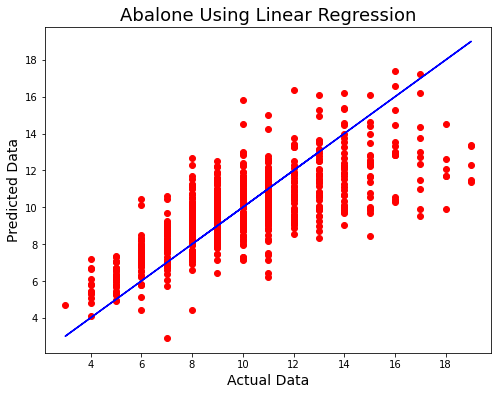

In [100]:
plt.figure(figsize=(8,6))
plt.scatter(x=target_test,y=pred_test,color='r')
plt.plot(target_test,target_test,color='b')
plt.xlabel('Actual Data',fontsize=14)
plt.ylabel('Predicted Data',fontsize=14)
plt.title('Abalone Using Linear Regression',fontsize=18)
plt.show()

Linear Regression model is predicting good when number of rings are less than 12 but not more than that

# Regularization

In [101]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

In [102]:
from sklearn.linear_model import Lasso

parameters={'alpha':[0.0001,0.001,0.01,0.1,1,10], 'random_state':list(range(0,10)) }
ls= Lasso()
clf=GridSearchCV(ls,parameters)
clf.fit(features_train,target_train)

print("Best Params:",clf.best_params_)


Best Params: {'alpha': 0.0001, 'random_state': 0}


In [103]:
ls=Lasso(alpha=0.0001,random_state=0)
ls.fit(features_train,target_train)
ls.score(features_train,target_train)
pred_ls=ls.predict(features_test)
lss=r2_score(target_test,pred_ls)
lss

0.5241099732941699

In [110]:
cv_score=cross_val_score(ls,features,target,cv=5)

In [111]:
cv_mean=cv_score.mean()
cv_mean

0.41473359893583356

# Ensemble Technique

In [112]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

In [113]:
parameters={'criterion':['mse','mae'],'max_features':["auto","sqrt","log2"]}
rf=RandomForestRegressor()
clf=GridSearchCV(rf,parameters)
clf.fit(features_train,target_train)

print(clf.best_params_)

{'criterion': 'mae', 'max_features': 'log2'}


In [115]:
rf=RandomForestRegressor(criterion="mae",max_features="log2")

rf.fit(features_train,target_train)
rf.score(features_train,target_train)
pred_decision=rf.predict(features_test)

rfs=r2_score(target_test,pred_decision)

print("R2 Score : ",rfs*100)

rfscore=cross_val_score(rf,features,target,cv=5)
rfc=rfscore.mean()
print("Cross Validation Score : ",rfc*100)

R2 Score :  56.24077599283983
Cross Validation Score :  45.84255732234445


We see that Radom Forest Regression has much better R2 Score than others

In [121]:
import pickle
filename="Abalone.pkl"
pickle.dump(rf,open(filename,'wb'))

The method of determining age of abalone through it's physical features is as relaible as the method determining it using number of rings as there is some relation but all factors are not completely dependent.
From the given data we can also say that a Female Abalone is more likely to live longer than other two sexes of the abalone.
Our EDA supports most of the already known facts about Abalone and its physical features.